In [1]:
# Homework 6 
# Name: Sanvi Khairnar

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass



Position COM for MilkyWay is, [-2.07  2.95 -1.45] kpc
Velocity COM for MilkyWay is, [ 0.94  6.32 -1.35] km / s 

Position COM for MilkyWay is, [-377.66  611.43 -284.64] kpc
Velocity COM for MilkyWay is, [ 72.85 -72.14  49.  ] km / s 

Position COM for MilkyWay is, [-476.22  491.44 -412.4 ] kpc
Velocity COM for MilkyWay is, [ 44.42 101.78 142.23] km / s 

The seperation between MW and M31 is, 769.098 kpc
The relative velocity between MW and M31 is, 117.738 km / s
The seperation between M33 and M31 is, 201.083 kpc
The relative velocity between M33 and M31 is, 117.738 km / s


In [9]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
        galaxy : `string`
            name of the galaxy
        start : `float`
            number of the first snapshot to read
        end : `float`
            number of the last snapshot to read
        n : `integer`
            number of intervals to itterate over to get COM
          
    outputs: 
        time : `float`
            time of snapshot for a given galaxy
        COM_p : `np.ndarray of astropy.Quantity`
            3-D position of the center of mass in kpc
        COM_v : `np.ndarray of astropy.Quantity`
            3-D velocity of the center of mass in km/s
            
    """
    
    # compose the filename for output
    fileout = "Orbit_" + "%s"%(galaxy) + ".txt" # string for filename to store orbit
    
    #  set tolerance and volDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    volDec = 2
    if (galaxy == "M33"):
        volDec = 4 # M33 will severely tidally striped at end of simulation
    
    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)
    snap_ids = np.arange(start, end, n)
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([len(snap_ids), 7])
    
    # a for loop 
    for i, snap_id in enumerate(snap_ids): # loop over files
        # compose the data filename (be careful about the folder)
        # add a string of the filenumber to the alue "000"
        ilbl = '000' + str(snap_id)
        # remove all but last 3 digits
        ilbl = ilbl[-3:]
        path = "C:/Users/sanvi/OneDrive/Desktop/ASTR 400B/400B_2023_Khairnar/Homeworks/Homework6/txtfiles/"
        filename = path + "%s_"%(galaxy) + ilbl + '.txt'
        ## print(filename)
        
        # Initialize an instance of CenterOfMass class, using disk particles
        COMfunction = CenterOfMass(filename,2.0) # for COM position disk particles give best estimate
        
        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_pos = COMfunction.COM_P(volDec, delta)
        COM_vel = COMfunction.COM_V(COM_pos[0], COM_pos[1], COM_pos[2])
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1) 
        orbit[i,0] = COMfunction.time.value/1000 # time in Column 1 in Gyr
        orbit[i,1] = COM_pos[0].value # x value for COM 
        orbit[i,2] = COM_pos[1].value # y for COM 
        orbit[i,3] = COM_pos[2].value # z for COM 
        orbit[i,4] = COM_vel[0].value # vx for COM 
        orbit[i,5] = COM_vel[1].value # vy for COM 
        orbit[i,6] = COM_vel[2].value # vz for COM 
        
        # print i and snap_id to see the progress
        ## print(i, snap_id)
        
    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [23]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
OrbitCOM("MW", 0, 800, 5)
OrbitCOM("M31", 0, 800, 5)
OrbitCOM("M33", 0, 800, 5)

In [24]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt

MW_COMdata = np.genfromtxt("Orbit_MW_.txt", skip_header=1)
M31_COMdata = np.genfromtxt("Orbit_M31_.txt", skip_header=1)
M33_COMdata = np.genfromtxt("Orbit_M33_.txt", skip_header=1)



In [25]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit  
def VectorMagnitude(v1, v2):
    """  Function to determine the magnitude of difference between two vectors.
    This fuction can hence determine the realative positive or relative vellocities of
    two objects.
    
    Inputs:
        v1: `numpy array`
            array of x, y, z values for object 1
        v2: `numpy array`
            array of x, y, z values for object 2
    Outputs:
        relative_val: `float`
            magnitude of diffrence between the two vectors 
    """
    rel_x = np.abs(v1[0]-v2[0])
    rel_y = np.abs(v1[1]-v2[1])
    rel_z = np.abs(v1[2]-v2[2])
    
    return np.sqrt(rel_x**2 + rel_y**2 +rel_z**2)

In [26]:
# Determine the magnitude of the relative position and velocities 

# of MW and M31
     
relpos_MW_M31 = np.zeros([len(MW_COMdata)])
relvel_MW_M31 = np.zeros([len(MW_COMdata)])
i=0
for v1, v2 in zip(MW_COMdata, M31_COMdata):
    MW_pos = v1[1:4] # position vector for MW
    MW_vel = v1[4:7] # velocity vector for MW
    M31_pos = v2[1:4] # position vector for M31
    M31_vel = v2[4:7] # velocity vector for M31
    
    relpos_MW_M31[i] = VectorMagnitude(MW_pos, M31_pos)
    relvel_MW_M31[i] = VectorMagnitude(MW_vel, M31_vel)
    i += 1

# of M33 and M31

relpos_M33_M31 = np.zeros([len(M33_COMdata)])
relvel_M33_M31 = np.zeros([len(M33_COMdata)])
i=0
for v1, v2 in zip(M33_COMdata, M31_COMdata):
    M33_pos = v1[1:4] # position vector for M33
    M33_vel = v1[4:7] # velocity vector for M33
    M31_pos = v2[1:4] # position vector for M31
    M31_vel = v2[4:7] # velocity vector for M31
    
    relpos_M33_M31[i] = VectorMagnitude(M33_pos, M31_pos)
    relvel_M33_M31[i] = VectorMagnitude(M33_vel, M31_vel)
    i += 1

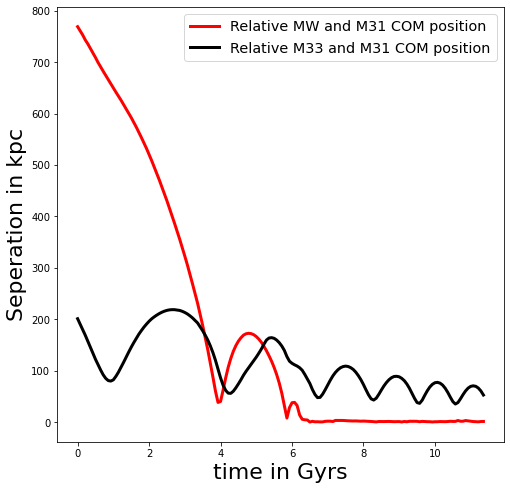

In [56]:
# Plot the Orbit of the galaxies 
#################################
time =MW_COMdata[:,0] 

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)

plt.plot(time, relpos_MW_M31, color = "red", linewidth = "3",
         label="Relative MW and M31 COM position")

plt.plot(time, relpos_M33_M31, color = "black", linewidth = "3",
         label="Relative M33 and M31 COM position")

# Add axis labels
plt.xlabel('time in Gyrs', fontsize=22)
plt.ylabel('Seperation in kpc', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')


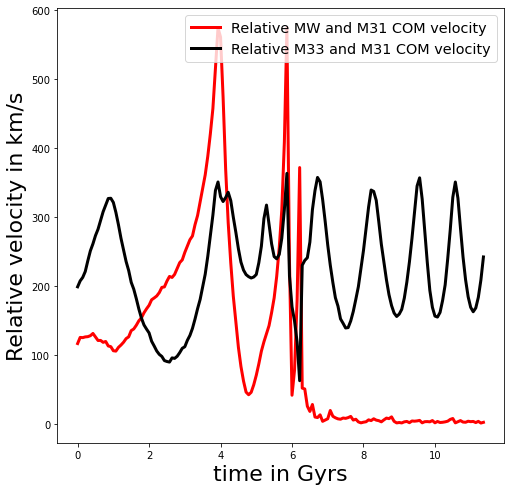

In [57]:
# Plot the orbital velocities of the galaxies 
#################################
time =MW_COMdata[:,0] 

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)

plt.plot(time, relvel_MW_M31, color = "red", linewidth = "3", 
         label="Relative MW and M31 COM velocity")

plt.plot(time, relvel_M33_M31, color = "black", linewidth = "3", 
         label="Relative M33 and M31 COM velocity")

# Add axis labels
plt.xlabel('time in Gyrs', fontsize=22)
plt.ylabel('Relative velocity in km/s', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')

### Questions

1. Based on the orbit plot for MW and M31 they will have a close encounter 3 times.

2. As the seperation between the galaxies decreases, their relative velocity is increased which is to be expected because of stronger garavitational pull. The direction of oscillation for plot relative velocity is opposite than for  seperation between the two galaxies.

3. MW nad M31 megre completely in about 6.5 Gyrs. By that time M33  is orbiting the common COM of MW and M31.

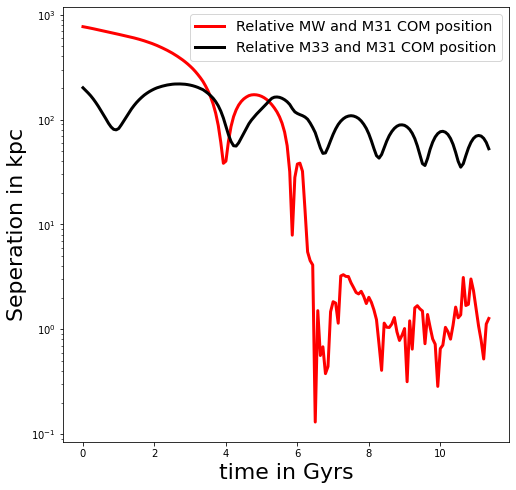

In [60]:
time =MW_COMdata[:,0] 

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)

plt.semilogy(time, relpos_MW_M31, color = "red", linewidth = "3",
         label="Relative MW and M31 COM position")

plt.semilogy(time, relpos_M33_M31, color = "black", linewidth = "3",
         label="Relative M33 and M31 COM position")

# Add axis labels
plt.xlabel('time in Gyrs', fontsize=22)
plt.ylabel('Seperation in kpc', fontsize=22)

legend = ax.legend(loc='upper right',fontsize='x-large')